In [122]:
from scipy.optimize import fsolve
import numpy as np
from matplotlib import pyplot as plt

In [39]:
from matplotlib import rc
rc('font',**{'family':'serif','serif':['Times']})
rc('text', usetex=True)
plt.rcParams['xtick.labelsize']=20
plt.rcParams['ytick.labelsize']=20
plt.rcParams['font.size']=20

### Free energy expression for the pure protein

For just the protein without SE DNA:

$f(\phi_p) = \rho_P(\phi_P-\alpha)^2(\phi_P-\beta)^2$

For just the protein with SE DNA:

$f(\phi_p) = \rho_P(\phi_P-\alpha)^2(\phi_P-\beta)^2 - ce^{-r^2/\sigma^2}$

In [123]:
class protein_FE:
    """
    Class that defines the free energy of the protein-solvent system in the presence and absence of SE DNA
    Absence of SE DNA: set self.c = 0
    Presence of SE DNA: set self.c = non-zero
    """
    
    def __init__(self, params):
        """
        Initialize parameters associate with the above free energy expression
        """
        self.phi_p_low = params['phi_p_low']
        self.phi_p_hi = params['phi_p_hi']
        self.rho_p = params['rho_p']
        self.alpha = params['alpha']
        self.beta = params['beta']
        self.c = params['c']
        self.sigma = params['sigma']
        self.spinodal_concs = self._get_spinodal_boundary()

    def mu_p(self, phi_p, r):
        """
        Return chemical potential as a function of phi_p
        """
        return 4*self.rho_p*(phi_p-self.alpha)*(phi_p-self.beta)*(phi_p-0.5*(self.alpha+self.beta))  \
                - self.c*np.exp(-r**2/self.sigma**2)
    
    def _dmu_p_dphi_p(self, phi_p):
        """
        Function to compute the second derivative of the free energy with respect to phi_p
        """
        return 2*self.rho_p*(6*phi_p**2 - 6*phi_p*(self.alpha+self.beta) + self.alpha**2 + self.beta**2 
                             + 4*self.alpha*self.beta)
    
    def _get_spinodal_boundary(self):
        """
        Function the calculates the upper and lower concentrations bounds of the spinodal region
        """
        lower_bound_conc = fsolve(self._dmu_p_dphi_p, (self.phi_p_low,))
        upper_bound_conc = fsolve(self._dmu_p_dphi_p, (self.phi_p_hi,))
        return (lower_bound_conc, upper_bound_conc)

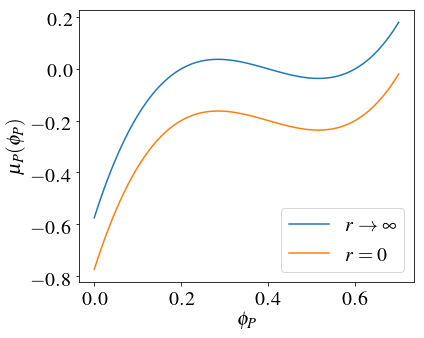

In [126]:
fig, axs = plt.subplots(1,1,figsize=(6,5))

params = {
    'phi_p_low': 0.0,
    'phi_p_hi': 0.7,
    'rho_p': 3.0,
    'alpha': 0.2,
    'beta': 0.6,
    'c': 0.0,
    'sigma': 5.0
    }

FE = protein_FE(params)

# Plotting the chemical potential
n_points = 100
phi_range = np.linspace(params['phi_p_low'], params['phi_p_hi'], n_points)
axs.plot(phi_range, FE.mu_p(phi_range, r=0.0), label=r'$r \rightarrow \infty$')

params = {
    'phi_p_low': 0.00,
    'phi_p_hi': 0.7,
    'rho_p': 3.0,
    'alpha': 0.2,
    'beta': 0.6,
    'c': 0.2,
    'sigma': 5.0
    }

FE = protein_FE(params)

# Plotting the chemical potential
n_points = 100
phi_range = np.linspace(params['phi_p_low'], params['phi_p_hi'], n_points)
axs.plot(phi_range, FE.mu_p(phi_range, r=0.0), label=r'$r = 0 $')

axs.set_xlabel(r'$\phi_P$')
axs.set_ylabel(r'$\mu_P(\phi_P)$')
axs.legend()

plt.savefig('Figures for paper/chemical_potential_at_different_r.svg', format='svg', dpi=600)

### Flory Huggins expression for free energy of the protein-solvent system

For just the protein without SE DNA:

$f(\phi_p) = \frac{\phi_P}{N_P}\log(\phi_p) + (1-\phi_P)\log(1-\phi_p) - \chi_P\phi_P^2$

For just the protein with SE DNA:

$f(\phi_p) = \frac{\phi_P}{N_P}\log(\phi_p) + (1-\phi_P)\log(1-\phi_p) - \chi_P\phi_P^2 - ce^{-r^2/\sigma^2}$

In [167]:
class protein_FE_FH:
    """
    Class that defines the free energy of the protein-solvent system in the presence and absence of SE DNA
    Absence of SE DNA: set self.c = 0
    Presence of SE DNA: set self.c = non-zero
    """
    
    def __init__(self, params):
        """
        Initialize parameters associate with the above free energy expression
        """
        self.phi_p_low = params['phi_p_low']
        self.phi_p_hi = params['phi_p_hi']
        self.N_P = params['N_P']
        self.chi_p = params['chi_p']
        self.c = params['c']
        self.sigma = params['sigma']
        self.spinodal_concs = self._get_spinodal_boundary()

    def mu_p(self, phi_p, r):
        """
        Return chemical potential as a function of phi_p
        """
        return ((1.0+np.log(phi_p))/self.N_P - (1.0+np.log(1.0-phi_p)) - 2*self.chi_p*phi_p
                - self.c*np.exp(-r**2/self.sigma**2))
    
    def _dmu_p_dphi_p(self, phi_p):
        """
        Function to compute the second derivative of the free energy with respect to phi_p
        """
        return 1.0/(self.N_P*phi_p) + 1.0/(1.0-phi_p) - 2.0*self.chi_p
    
    def _get_spinodal_boundary(self):
        """
        Function the calculates the upper and lower concentrations bounds of the spinodal region
        """
        lower_bound_conc = fsolve(self._dmu_p_dphi_p, (self.phi_p_low,))
        upper_bound_conc = fsolve(self._dmu_p_dphi_p, (self.phi_p_hi,))
        return (lower_bound_conc, upper_bound_conc)

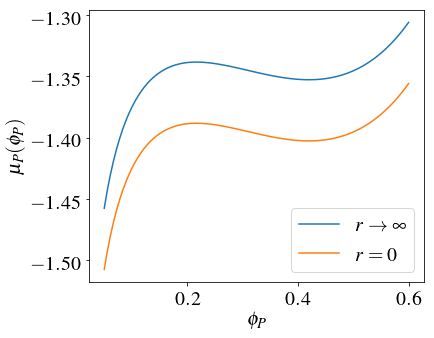

In [172]:
fig, axs = plt.subplots(1,1,figsize=(6,5))

params = {
    'phi_p_low': 0.05,
    'phi_p_hi': 0.6,
    'N_P': 5.0,
    'chi_p': 1.1,
    'c': 0.0,
    'sigma': 5.0
    }

FE = protein_FE_FH(params)

# Plotting the chemical potential
n_points = 100
phi_range = np.linspace(params['phi_p_low'], params['phi_p_hi'], n_points)
axs.plot(phi_range, FE.mu_p(phi_range, r=0.0), label=r'$r \rightarrow \infty$')

params = {
    'phi_p_low': 0.05,
    'phi_p_hi': 0.6,
    'N_P': 5.0,
    'chi_p': 1.1,
    'c': 0.05,
    'sigma': 5.0
    }


FE = protein_FE_FH(params)

# Plotting the chemical potential
n_points = 100
phi_range = np.linspace(params['phi_p_low'], params['phi_p_hi'], n_points)
axs.plot(phi_range, FE.mu_p(phi_range, r=0.0), label=r'$r = 0 $')

axs.set_xlabel(r'$\phi_P$')
axs.set_ylabel(r'$\mu_P(\phi_P)$')
axs.legend()

plt.savefig('Figures for paper/FH_chemical_potential_at_different_r.svg', format='svg', dpi=600)

In [173]:
FE.spinodal_concs

(array([0.21654236]), array([0.41982127]))